In [11]:
import pandas as pd
# Reading in dataset
df = pd.read_csv("movies_final.csv")

### Plots

#### Number of Movies by Release Year for each platform 

##### Netflix

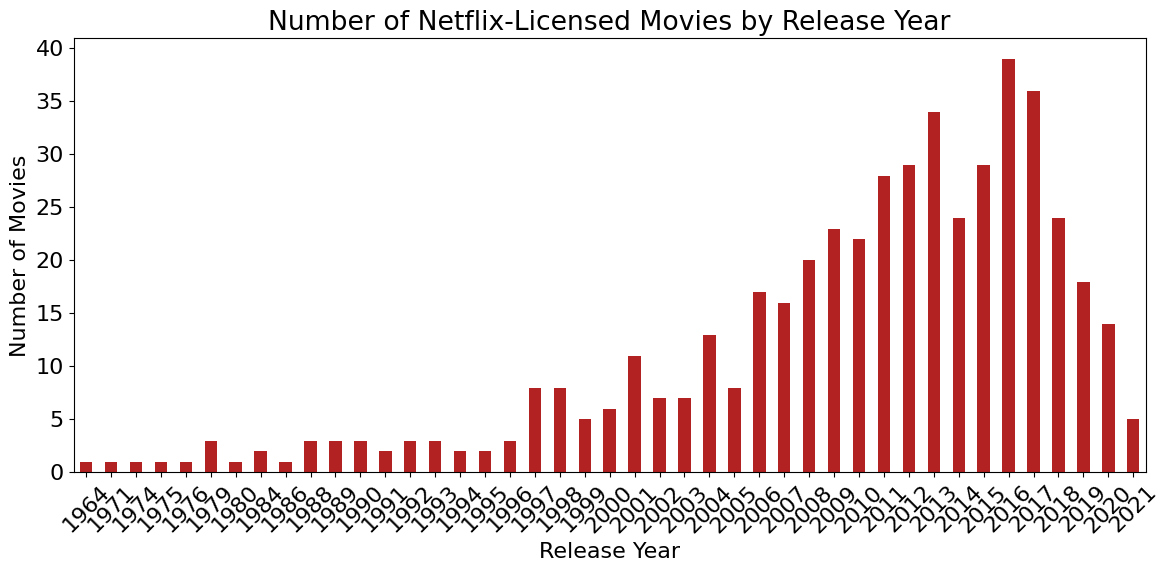

In [12]:
# Importing packages 
import matplotlib.pyplot as plt

# Creating a df for Netflix movies
df_netflix = df[df["Netflix"] == 1]

# Counting movies by release year
age_counts = df_netflix.groupby("Year")["Title"].count()

# Creating the plot
plt.figure(figsize=(12,6))
age_counts.plot(kind="bar", color="firebrick")
plt.title("Number of Netflix-Licensed Movies by Release Year")
plt.xlabel("Release Year")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.rcParams.update({'font.size': 16})
plt.tight_layout()
plt.show()

##### Hulu

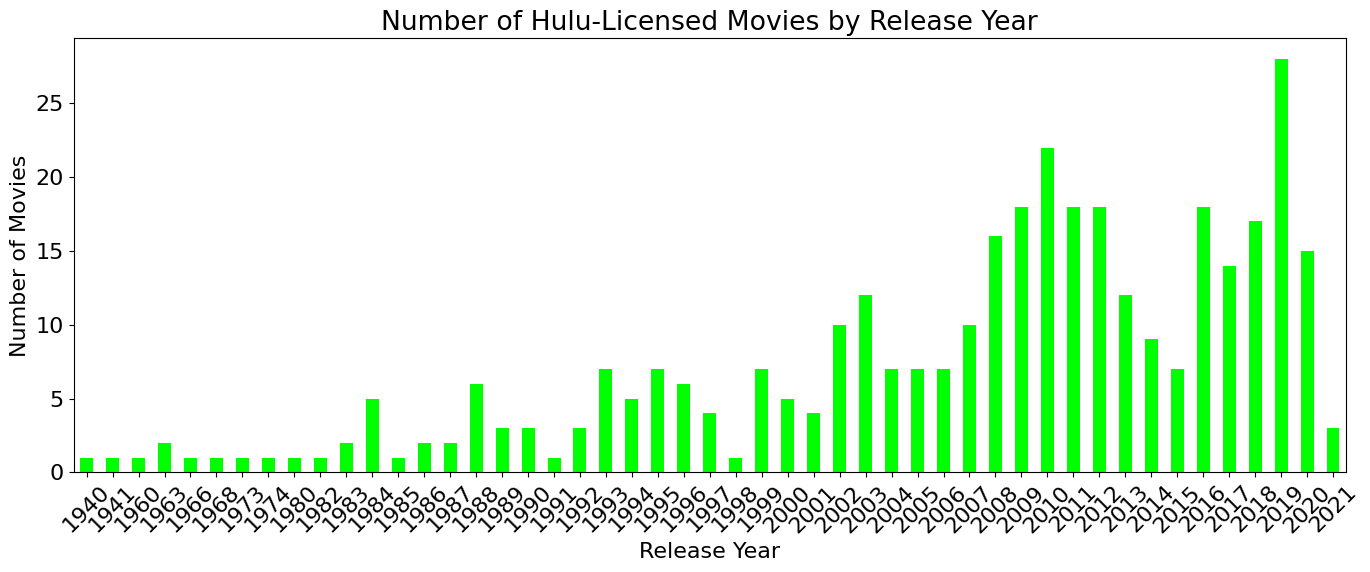

In [13]:
# Creating a df for Hulu movies
df_hulu = df[df["Hulu"] == 1]

# Counting movies by release year
age_counts = df_hulu.groupby("Year")["Title"].count()

# Creating the plot
plt.figure(figsize=(14, 6))
age_counts.plot(kind="bar", color="lime")
plt.title("Number of Hulu-Licensed Movies by Release Year")
plt.xlabel("Release Year")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.rcParams.update({'font.size': 16})
plt.tight_layout()
plt.show()

##### Prime Video

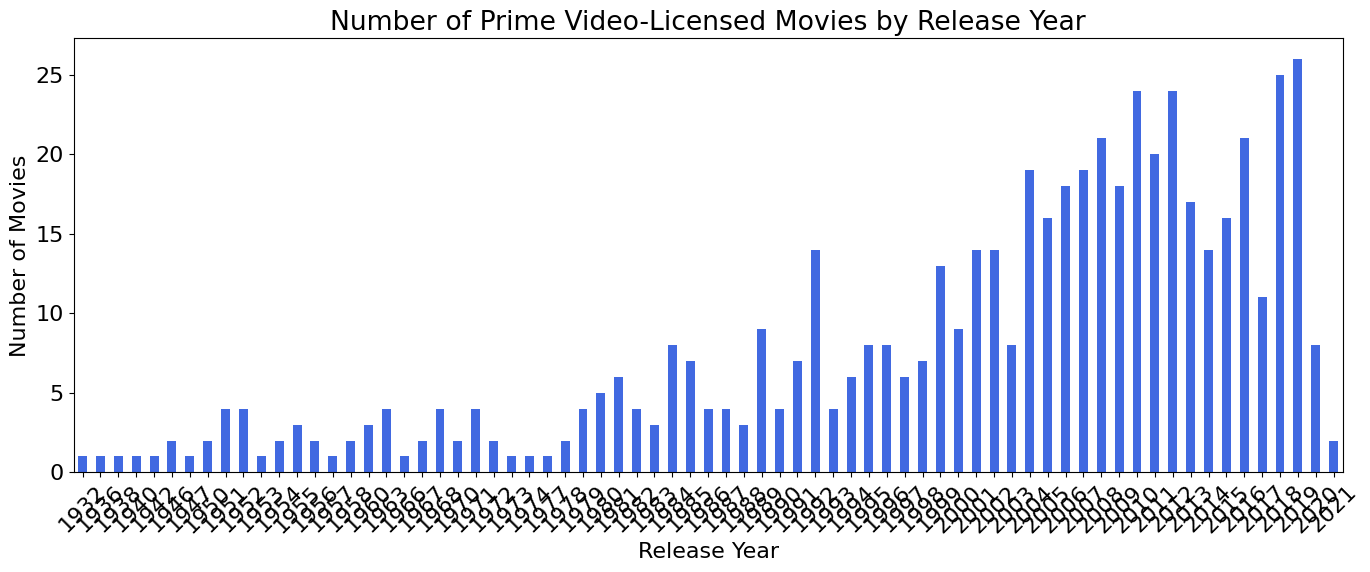

In [14]:
# Creating a df for Prime Video movies
df_pv = df[df["Prime Video"] == 1]

# Counting movies by release year
age_counts = df_pv.groupby("Year")["Title"].count()

# Creating the plot
plt.figure(figsize=(14, 6))
age_counts.plot(kind="bar", color="royalblue")
plt.title("Number of Prime Video-Licensed Movies by Release Year")
plt.xlabel("Release Year")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.rcParams.update({'font.size': 16})
plt.tight_layout()
plt.show()

##### Disney+

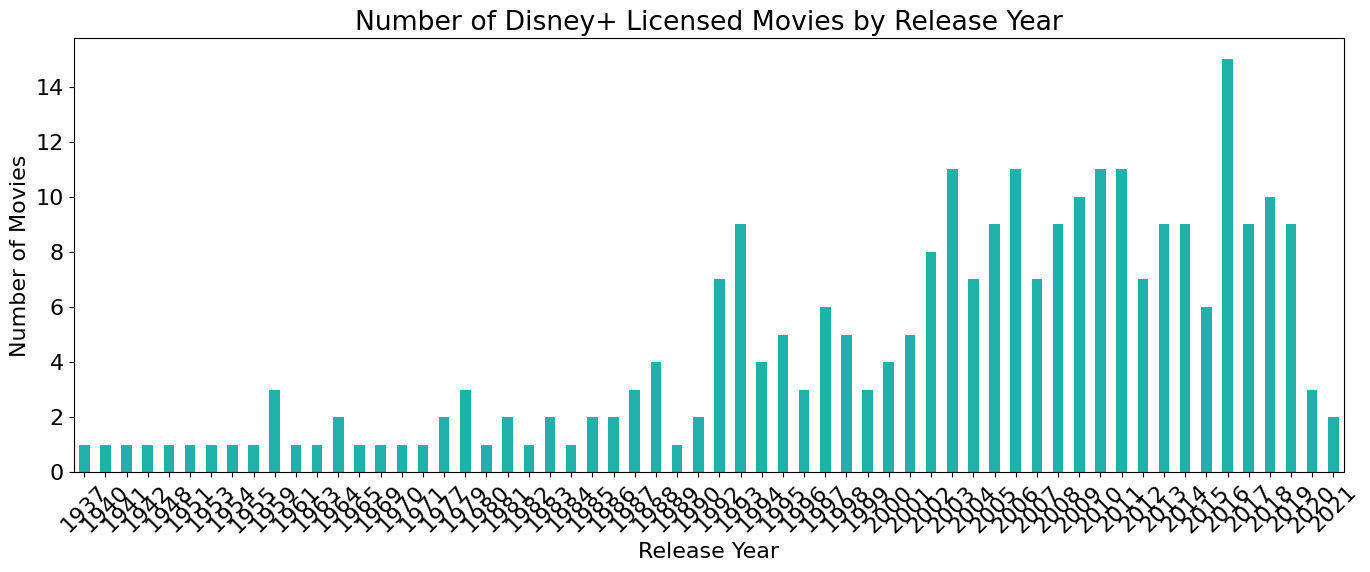

In [15]:
# Creating a df for Disney+ movies
df_disney = df[df["Disney+"] == 1]

# Counting movies by release year
age_counts = df_disney.groupby("Year")["Title"].count()

# Creating the plot
plt.figure(figsize=(14, 6))
age_counts.plot(kind="bar", color="lightseagreen")
plt.title("Number of Disney+ Licensed Movies by Release Year")
plt.xlabel("Release Year")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.rcParams.update({'font.size': 16})
plt.tight_layout()
plt.show()

#### Stacked Bar Number of Movies by Genre

In [16]:
# Creating a df of platform names
platforms = ["Netflix", "Hulu", "Prime Video", "Disney+"]

# Importing packages
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# load colormap
cmap = cm.get_cmap('tab20')

# pick 4 consistent colors
colors = {
    "Netflix":    "firebrick",
    "Prime Video": "royalblue",
    "Disney+":  "lightseagreen",
    "Hulu":     "lime"
}

/tmp/ipykernel_699939/848760666.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab20')


<Figure size 1400x800 with 0 Axes>

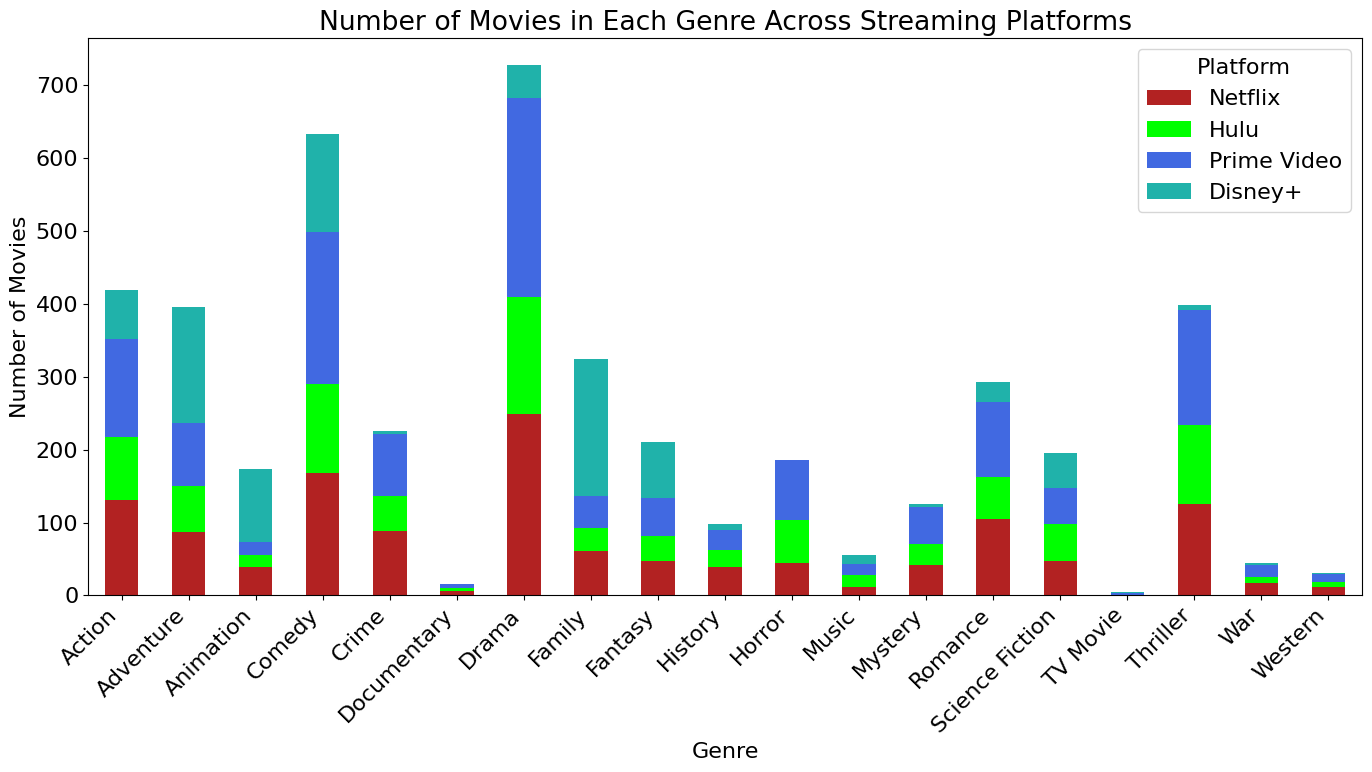

In [17]:
# Creating df with genre names
genres = [
   'Action','Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama',
    'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance',
    'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']

# Initializing a dataframe
genre_counts = pd.DataFrame(index=platforms, columns=genres)

# Loop that goes through each platform, adding genre counts
for platform in platforms:
    platform_df = df[df[platform] == 1] # movies on that platform
    genre_counts.loc[platform] = platform_df[genres].sum()

# Creating plot
plt.figure(figsize=(14, 8))

genre_counts.T.plot(
    kind="bar",
    stacked=True,
    figsize=(14, 8),
    color=[colors[p] for p in platforms]   # uses assigned colormap for each respective platform
)
# Labels 
plt.title("Number of Movies in Each Genre Across Streaming Platforms")
plt.xlabel("Genre")
plt.ylabel("Number of Movies")

# Formating
plt.xticks(rotation=45, ha="right")
plt.legend(title="Platform")
plt.rcParams.update({'font.size': 16})
plt.tight_layout()
plt.show()

#### Bar Chart for Average Budget per Streaming Platform

In [18]:
# Calculating the average movie budget for each platform 
avg_budget = {
    platform: df[df[platform] == 1]["budget"].mean()
    for platform in platforms
}
avg_budget

{'Netflix': np.float64(31677353.0513347),
 'Hulu': np.float64(31898612.66855524),
 'Prime Video': np.float64(19599196.324909747),
 'Disney+': np.float64(83508143.04074074)}

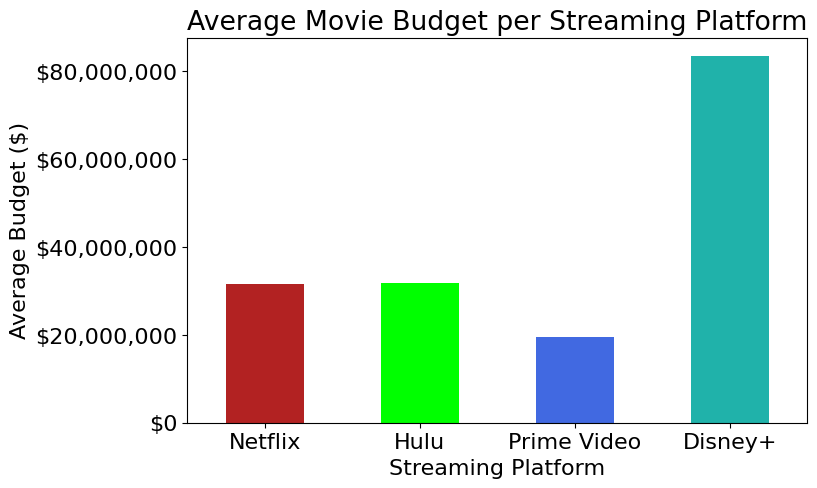

In [19]:
# Importing packages
import matplotlib.ticker as mtick

# Initializing a dataframe
avg_budget_df = pd.DataFrame.from_dict(avg_budget, orient="index", columns=["Average Budget"])

# Creating the plot 
plt.figure(figsize=(8, 5))
avg_budget_df["Average Budget"].plot(kind="bar", color=[colors[p] for p in platforms]) # uses assigned colormap for each respective platform

plt.title("Average Movie Budget per Streaming Platform")
plt.ylabel("Average Budget ($)")
plt.xlabel("Streaming Platform")

plt.xticks(rotation=0)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
plt.show()

#### Bar Chart for Average Hits per Streaming Platform

In [20]:
# Calculating the average number of movie hits for each platform 
avg_hits = {
    platform: df[df[platform] == 1]["Movie_Hits"].mean()
    for platform in platforms
}
avg_hits

{'Netflix': np.float64(30.178794178794178),
 'Hulu': np.float64(36.30085959885387),
 'Prime Video': np.float64(25.01277372262774),
 'Disney+': np.float64(24.62962962962963)}

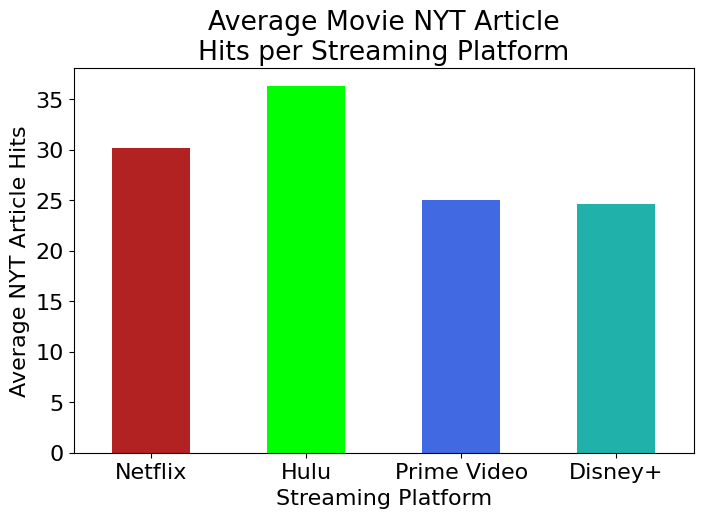

In [21]:
# Initializing a dataframe
avg_hits_df = pd.DataFrame.from_dict(avg_hits, orient="index", columns=["Average Hits"])

# Creating the plot
plt.figure(figsize=(8, 5))
avg_hits_df["Average Hits"].plot(kind="bar", color=[colors[p] for p in platforms]) # uses assigned colormap for each respective platform

plt.title("Average Movie NYT Article\nHits per Streaming Platform")
plt.ylabel("Average NYT Article Hits")
plt.xlabel("Streaming Platform")
plt.xticks(rotation=0)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.show()

#### Bar Chart for Average Overview Compound Score per Streaming Platform

In [22]:
# Calculating the average compound overview score for each platform 
avg_compound = {
    platform: df[df[platform] == 1]["overview_compound"].mean()
    for platform in platforms
}
avg_compound

{'Netflix': np.float64(-0.09194312114989733),
 'Hulu': np.float64(-0.10960821529745042),
 'Prime Video': np.float64(-0.11108050541516244),
 'Disney+': np.float64(0.09965259259259258)}

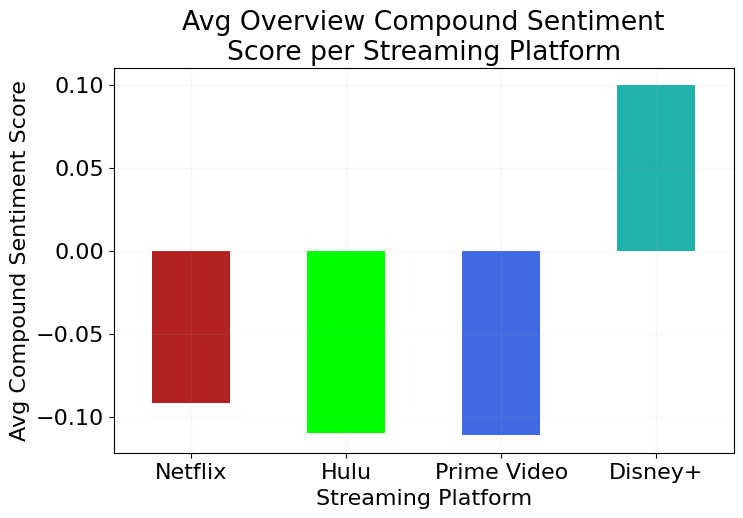

In [23]:
# Initializing a dataframe
avg_compound_df = pd.DataFrame.from_dict(avg_compound, orient="index", columns=["Average Overview Compound Score"])

# Creating the plot
plt.figure(figsize=(8, 5))
avg_compound_df["Average Overview Compound Score"].plot(kind="bar", color=[colors[p] for p in platforms]) # uses assigned colormap for each respective platform

plt.title("Avg Overview Compound Sentiment\nScore per Streaming Platform")
plt.ylabel("Avg Compound Sentiment Score")
plt.xlabel("Streaming Platform")
plt.xticks(rotation=0)
plt.grid(True, alpha=0.1)
plt.show()

#### Analyzing Other Average Sentiment Scores per Streaming Platform

<Figure size 1000x600 with 0 Axes>

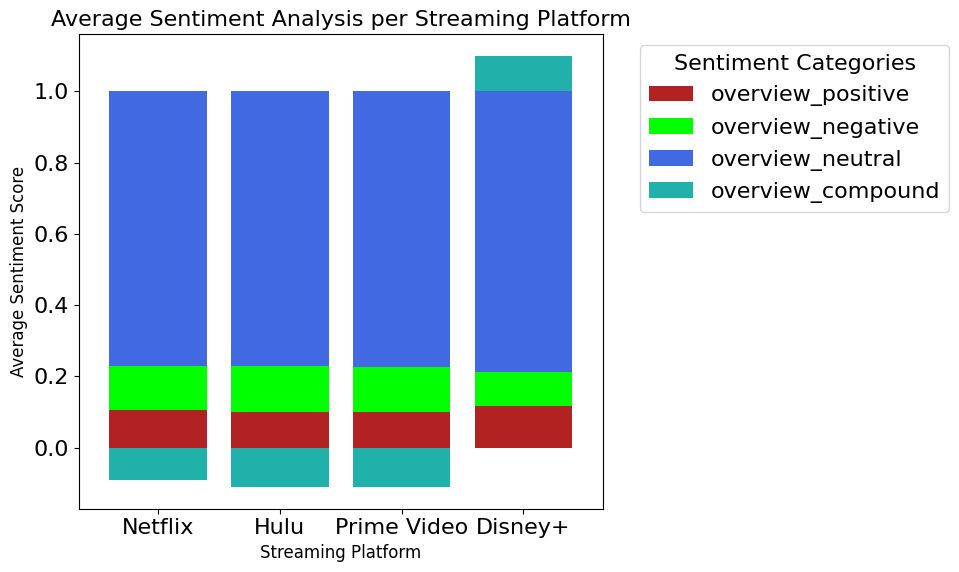

In [24]:
# Stacked bar for all OVERVIEW sentiment (all very similar except for compound)

# Calculate the average for each sentiment category for each platform
avg_sentiments = {
    platform: {
        'overview_positive': df[df[platform] == 1]["overview_positive"].mean(),
        'overview_negative': df[df[platform] == 1]["overview_negative"].mean(),
        'overview_neutral': df[df[platform] == 1]["overview_neutral"].mean(),
        'overview_compound': df[df[platform] == 1]["overview_compound"].mean(),
    }
    for platform in platforms
}

# Convert the dictionary into a DataFrame
avg_sentiments_df = pd.DataFrame.from_dict(avg_sentiments, orient="index")

# Plotting the stacked bar chart
plt.figure(figsize=(10, 6))
ax = avg_sentiments_df.plot(kind="bar", stacked=True, figsize=(10, 6),  color=[colors[p] for p in platforms] , width=0.8)

# Customize plot
plt.title("Average Sentiment Analysis per Streaming Platform", fontsize=16)
plt.ylabel("Average Sentiment Score", fontsize=12)
plt.xlabel("Streaming Platform", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Sentiment Categories", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

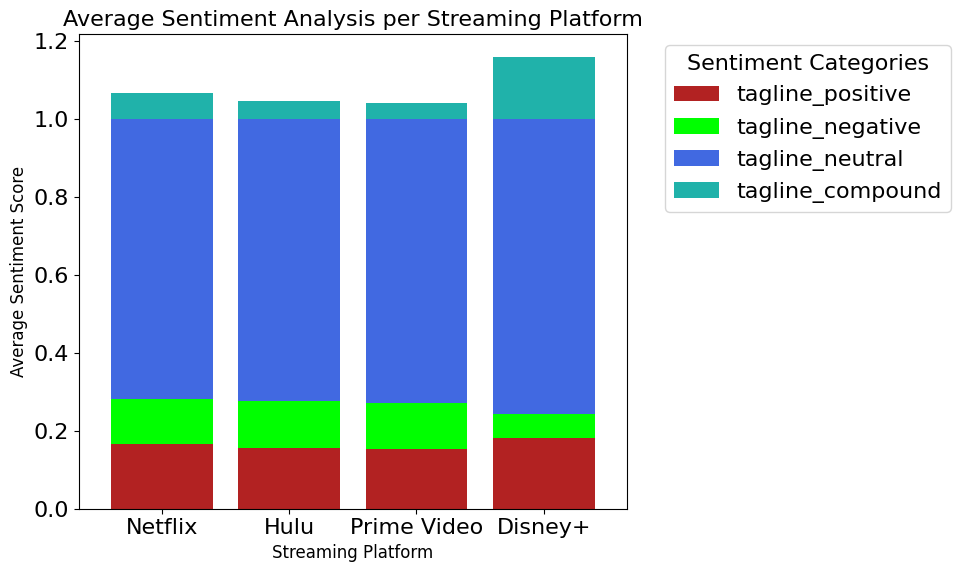

In [25]:
# Stacked bar for all TAGLINE sentiment (all very similar except for compound)

# Calculate the average for each sentiment category for each platform
avg_sentiments = {
    platform: {
        'tagline_positive': df[df[platform] == 1]["tagline_positive"].mean(),
        'tagline_negative': df[df[platform] == 1]["tagline_negative"].mean(),
        'tagline_neutral': df[df[platform] == 1]["tagline_neutral"].mean(),
        'tagline_compound': df[df[platform] == 1]["tagline_compound"].mean(),
    }
    for platform in platforms
}

# Convert the dictionary into a DataFrame
avg_sentiments_df = pd.DataFrame.from_dict(avg_sentiments, orient="index")

# Plotting the stacked bar chart
plt.figure(figsize=(10, 6))
ax = avg_sentiments_df.plot(kind="bar", stacked=True, figsize=(10, 6),  color=[colors[p] for p in platforms] , width=0.8)

# Customize plot
plt.title("Average Sentiment Analysis per Streaming Platform", fontsize=16)
plt.ylabel("Average Sentiment Score", fontsize=12)
plt.xlabel("Streaming Platform", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Sentiment Categories", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()


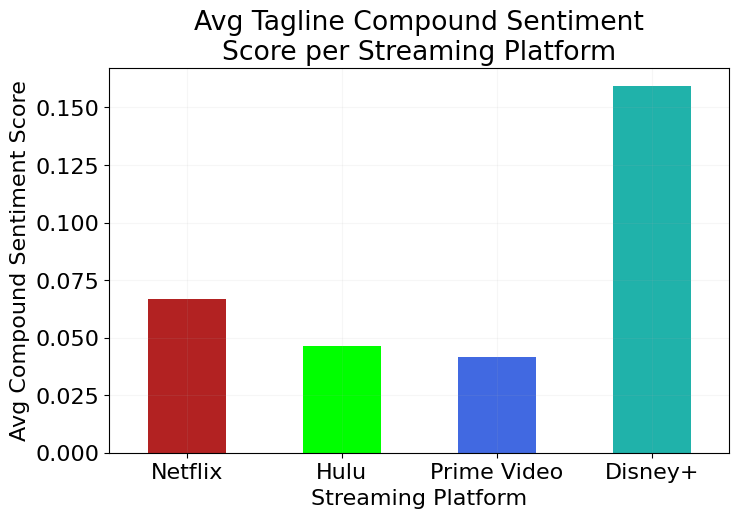

In [26]:
# Calculating the average compound tagline score for each platform 
avg_compound = {
    platform: df[df[platform] == 1]["tagline_compound"].mean()
    for platform in platforms
}
avg_compound

# Initializing a dataframe
avg_compound_df = pd.DataFrame.from_dict(avg_compound, orient="index", columns=["Average Tagline Compound Score"])

# Creating the plot
plt.figure(figsize=(8, 5))
avg_compound_df["Average Tagline Compound Score"].plot(kind="bar", color=[colors[p] for p in platforms])

plt.title("Avg Tagline Compound Sentiment\nScore per Streaming Platform")
plt.ylabel("Avg Compound Sentiment Score")
plt.xlabel("Streaming Platform")
plt.xticks(rotation=0)
plt.grid(True, alpha=0.1)
plt.show()

#### Multi-line chart for Movie Counts by Year

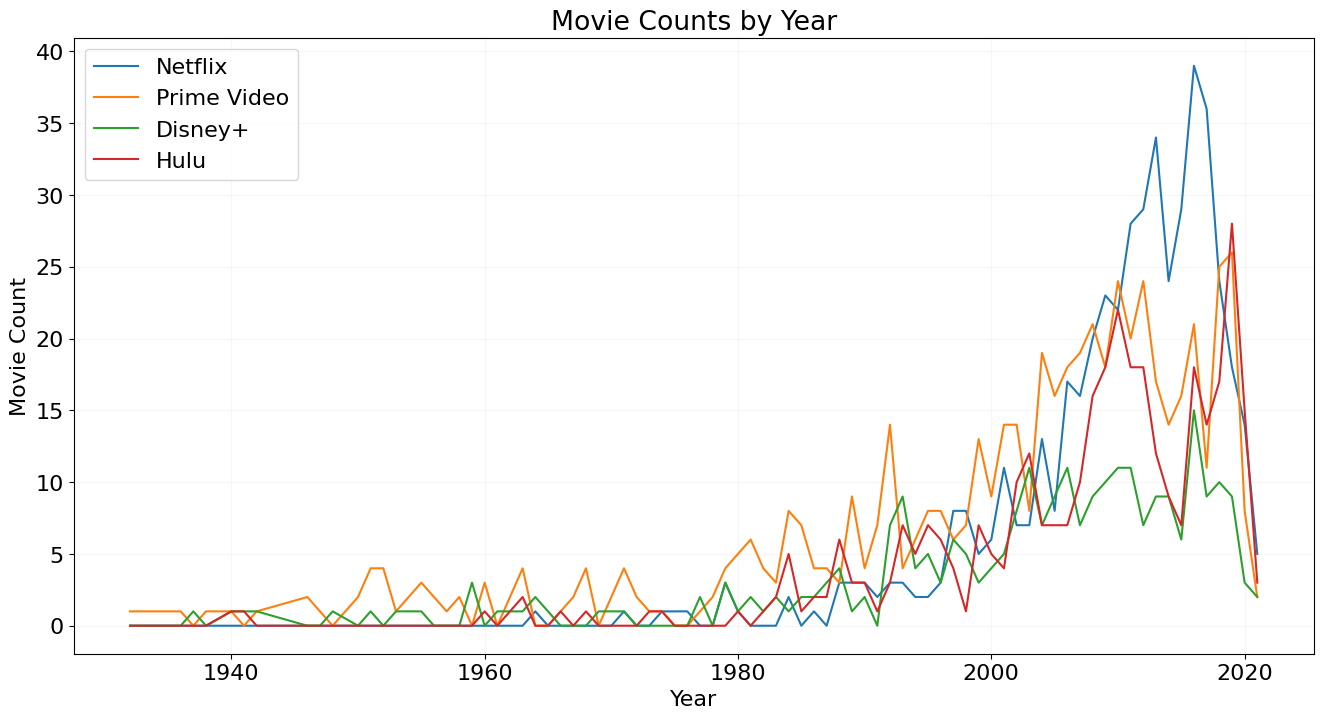

In [27]:
# Count movies per year per platform
netflix = df[df["Netflix"] == 1].groupby("Year").size()
prime = df[df["Prime Video"] == 1].groupby("Year").size()
disney = df[df["Disney+"] == 1].groupby("Year").size()
hulu = df[df["Hulu"] == 1].groupby("Year").size()

years = sorted(df["Year"].unique())

plt.figure(figsize=(16, 8))

plt.plot(years, netflix.reindex(years, fill_value=0), label="Netflix")
plt.plot(years, prime.reindex(years, fill_value=0), label="Prime Video")
plt.plot(years, disney.reindex(years, fill_value=0), label="Disney+")
plt.plot(years, hulu.reindex(years, fill_value=0), label="Hulu")

plt.title("Movie Counts by Year")
plt.xlabel("Year")
plt.ylabel("Movie Count")
plt.legend()
plt.grid(True, alpha=0.1)

plt.show()


#### Grid of Line Charts for Movie Counts by Year for each platform

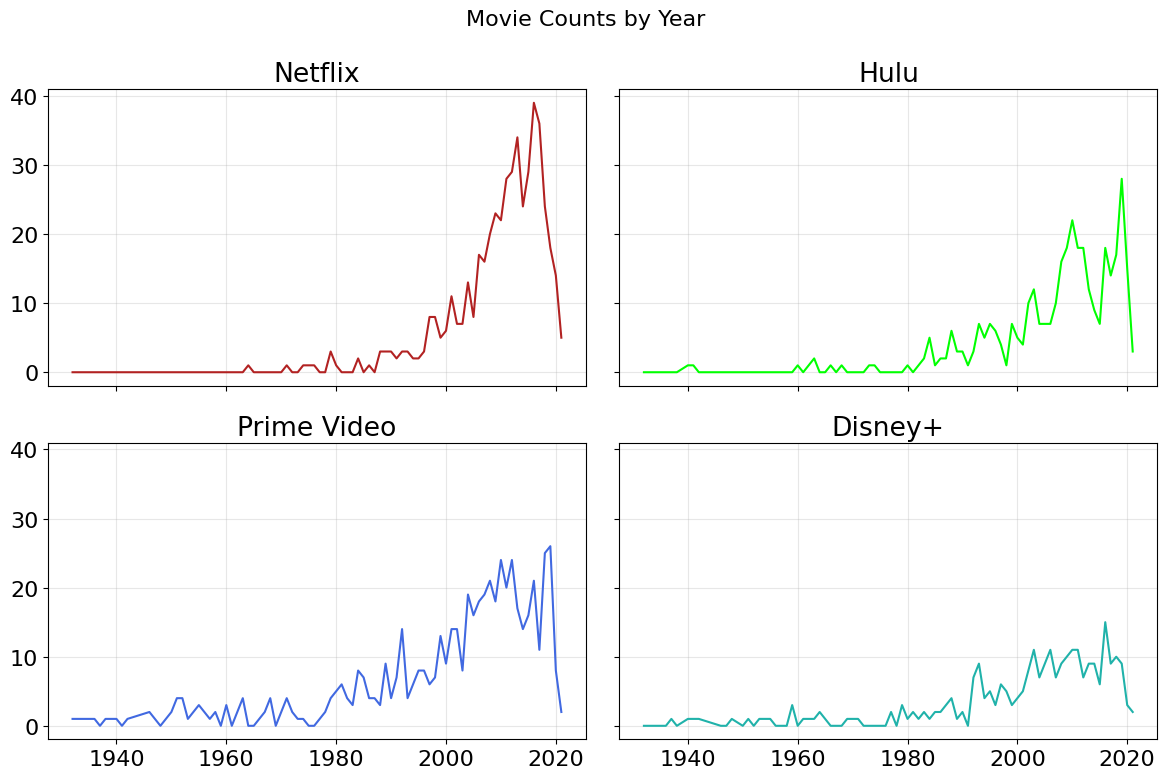

In [28]:
import matplotlib.cm as cm

# Creating a dictionary with key,value pairs for platform and movie counts by year
platform_data = {
    p: df[df[p] == 1]  # Filter rows where the movie is available on platform p
        .groupby("Year") # Group those movies by Year
        .size() # Count how many movies in each year
        .reindex(years, fill_value=0) # If years are missing, inputs 0 
    for p in platforms # done for every platform 
}

# Plot grid
# Create a grid of subplots: 2 rows × 2 columns
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=True)
axes = axes.flatten()

# Loop through each subplot (ax) and platform name
for ax, platform in zip(axes, platforms):
    counts = platform_data[platform]
    ax.plot(years, counts, color=colors[platform])
    ax.set_title(platform)
    ax.grid(True, alpha=0.3)

fig.suptitle("Movie Counts by Year", fontsize=16)
# No overlap
plt.tight_layout()
# Prints plot
plt.show()